In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('data')
cursor = conn.cursor()

In [8]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        OrderID INTEGER PRIMARY KEY,
        Category TEXT,
        Qty INTEGER,
        Amount REAL
    )
''')

In [9]:
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('kurta', 1, 406),
        ('Top', 1, 574),
        ('Set', 1, 824),
        ('Western Dress', 1, 791),
        ('Ethnic Dress', 1, 699),
        ('Bottom', 1, 377)
    ]
    cursor.executemany('INSERT INTO sales (Category, Qty, Amount) VALUES (?, ?, ?)', sample_data)
    conn.commit()

In [10]:
query = '''
    SELECT 
        Category,
        SUM(Qty) AS total_qty,
        SUM(Qty * Amount) AS revenue
    FROM sales
    GROUP BY Category
'''
df = pd.read_sql_query(query, conn)

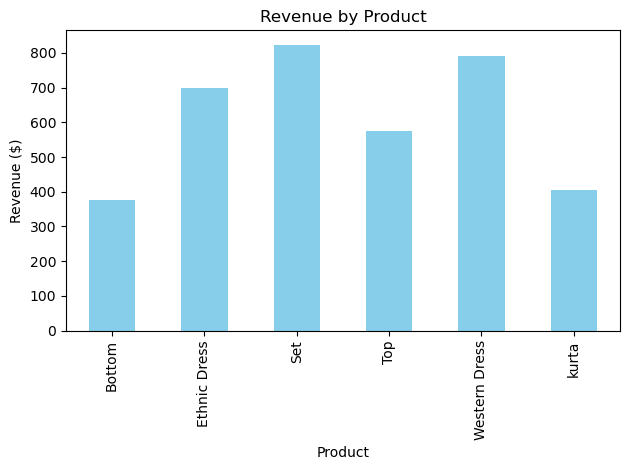

In [11]:
df.plot(kind='bar', x='Category', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()

In [12]:
conn.close()